# 9.1 Point estimation
**Point estimation**: A single number calculated using sample data that represents a plausible value of a population characteristic.
For example: the calculated value of the sample mean, $\bar{x}$ is one point estimate of a population mean, 𝜇. the sample proportion, $\hat{p}$ is a point estimate of a population proportion, 𝑝.

## Biased vs unbiased
- Unbiased statistic: A statistic whose mean value is equal to the value of the population characteristic being estimated.
- Biased statisticL A statistic that is not unbiased.

Given several unbiased statistics that might be used for estimating a population characteristic, the best choice is the statistic with the smallest standard deviation.

# 9.2 Large-Sample Confidence Interval for a Population Proportion
Recall the population variance is denoted $\sigma^2$. 
The sample variance
$$𝑠^2=(\sum_{x} (𝑥−\bar{x})^2)/(𝑛−1)$$
is a good choice for obtaining a point estimate of the population variance, $\sigma^2$.

It can be shown that 𝑠^2 is an unbiased statistic for estimating $\sigma^2$. This means that the mean of the sampling distribution of $𝑠^2$ is $\sigma^2$,.

## estimation of standard deviation
Unfortunately, the fact that $𝑠^2$ is an unbiased statistic for estimating $\sigma^2$ does not imply that 𝑠 is an unbiased statistic for estimating 𝜎.  The sample standard deviation tends to **underestimate** slightly the actual value of 𝜎. However, unbiasedness is not the only criterion by which a statistic can be judged, and there are other good reasons for using 𝑠 to estimate 𝜎 Whenever we need to estimate 𝜎 based on a single random sample, we will use the statistic 𝑠 to obtain a point estimate.

## Confidence interval
- **Confidence interval**: An interval of plausible values for a population characteristic. A confidence interval is constructed so that we have a chosen level of confidence that the actual value of the population characteristic will be between the lower endpoint and the upper endpoint of the interval.
- **Confidence level**: denoted as $\alpha$. The success rate of the method used to construct a confidence interval.

## confidence interval of 𝑝 using $\hat{p}$

Recall that when 𝑛 is large and the sample size is less than 10% of the population size, the statistic $\hat{p}$ has a sampling distribution that is approximately normal with mean $𝑝$ and standard deviation $\sqrt{\frac{𝑝(1−𝑝)}{𝑛}}$

## Example of a 95% confidence interval

For a confidence level of 95%, the z-score table  (e.g. https://www.z-table.com/) can be used to determine a value $𝑧^∗$ such that a central area of 0.95 falls between $−𝑧^∗$ and $𝑧^∗$. In this case, the remaining area of 0.05 is divided equally between the two tails. The total area to the left of the desired $𝑧^∗$ is equal to 0.975. By locating 0.975 in the body standard 𝑧-table, we find that the corresponding $𝑧^∗$ critical value is $𝑧^∗=1.96$.

This means when 𝑛 is large, approximately 95% of all random samples of size 𝑛 will result in a value of $\hat{p}$ that is within $1.96 \sigma_{\hat{p}} = 1.96\sqrt{(𝑝(1−𝑝))/𝑛}$ of the actual value of the population proportion 𝑝.

## General formula
When 
1. $\hat{p}$ is the sample proportion from a simple random sample.
2. the sample size 𝑛 is large $(𝑛\hat{p} \ge 10$ and $𝑛(1−\hat{p})≥10)$
3. if the sample is selected without replacement, the sample size is small relative to the population size (𝑛 is at most 10% of the population size)
The general formula for a confidence interval for a population proportion 𝑝 is
$$𝑝 \pm (\text{critical value of 𝑧}) \sqrt{\frac{𝑝(1−\hat{p})}{n}}$$
The desired confidence level determines which 𝑧-critical value is used. The three most commonly used confidence levels, **90%, 95%, and 99%**, use 𝑧 critical values **1.645, 1.96, and 2.58**, respectively.

## Example

### Generate population and collect samples

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean,pstdev

# Set up true p
true_p = 0.7

# Population is of size 10000, randomly generated 
np.random.seed(seed=42) # fix the random seed
population = np.random.choice(a=[0,1],size=10000,replace=True,p=[1-true_p,true_p]).astype(float)

# set the number of samples collected
n_samples = 100

# collect samples
samples = np.random.choice(population,n_samples,replace=True)

print("Samples are: ", samples)

Samples are:  [1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0.]


### Calculate confidence interval of 95% level

In [2]:
import numpy as np
import scipy.stats as st
from statistics import mean

# set up confidence interval
conf_level = 0.95

#create 95% confidence interval for population mean weight
conf_int = st.norm.interval(confidence=conf_level, loc=np.mean(samples), scale=st.sem(samples))
ci_l,ci_u = conf_int[0], conf_int[1]

### Plot samples, sample proportion, confidence interval of 95% confidence level

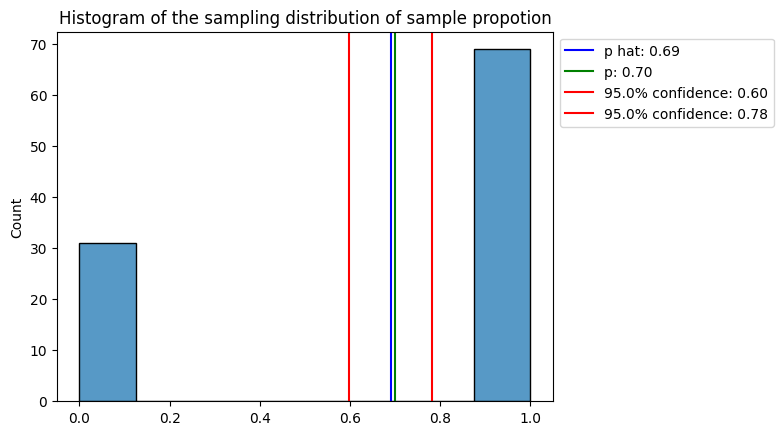

In [3]:
# plot
plt.title("Histogram of the sampling distribution of sample propotion")
sns.histplot(samples)
plt.axvline(x = mean(samples), color = 'b', label = f'p hat: {mean(samples):.2f}')
plt.axvline(x = true_p, color = 'g', label = f'p: {true_p:.2f}')
plt.axvline(x = ci_l, color = 'r', label = f'{conf_level*100}% confidence: {ci_l:.2f}')
plt.axvline(x = ci_u, color = 'r', label = f'{conf_level*100}% confidence: {ci_u:.2f}')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

## Choosing sample size for estimating population proportion
- **Standard error**: The estimated standard deviation of a statistic.
- **Margin of error**:  If the sampling distribution of a statistic is (at least approximately) normal, the margin of error, 𝑀, associated with a 95% confidence interval is (1.96)(standard error of the statistic).
- In general, suppose that we wish to estimate 𝑝 to within an amount 𝑀 (the specified margin of error) with 95% confidence. To find the necessary sample size, consider the equation $𝑀=1.96 \sqrt{(𝑝(1−𝑝)/𝑛)}$. Solving this equation for 𝑛 results in
$$𝑛=𝑝(1−𝑝) (1.96/𝑀)^2$$
- The value of 𝑝 may be estimated using prior information. In the absence of any such information, using **𝑝=0.5** in this formula gives a conservatively large value for the required sample size (this value of 𝑝 gives a larger 𝑛 than would any other value).
- If the desired confidence level is something other than 95%, 1.96 is replaced by the appropriate 𝑧 critical value (for example, 2.58 for 99% confidence).


# 9.3 Confidence Interval for a Population Mean

## 𝑡-distribution
If $\sigma$ is unknown, we must use the sample data to estimate $\sigma$. If we use the sample standard deviation as our estimate, the result is a different standardized variable denoted by 𝑡:
$$𝑡=(\bar{x} - \mu)/(𝑠/\sqrt{n}).$$

- **Degree of freedom**: 𝑡 distributions are distinguished by a positive whole number called the number of degrees of freedom (𝑑𝑓). When the sample size is 𝑛, the degrees of freedom can be calculated by 𝑑𝑓=𝑛−1

## Properties of 𝑡 Distributions
- The 𝑡 distribution corresponding to any particular number of degrees of freedom is bell shaped and centered at zero (just like the standard normal 𝑧 distribution).
- Each 𝑡 distribution is more spread out than the standard normal 𝑧 distribution.
- As the number of degrees of freedom increases, the variability of the corresponding 𝑡 distribution decreases.
- As the number of degrees of freedom increases, the corresponding sequence of 𝑡 distributions approaches the standard normal 𝑧 distribution.

(-5.0, 5.0)

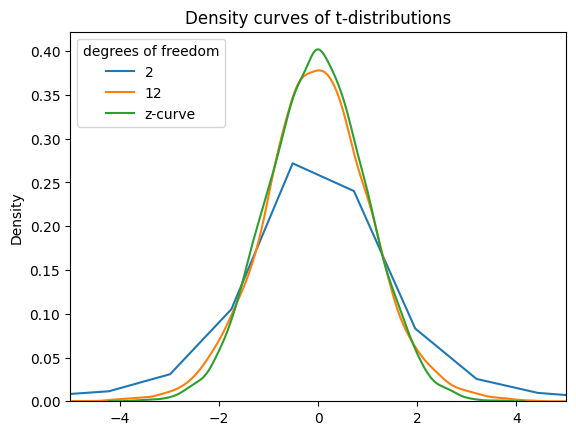

In [4]:
from scipy.stats import t,norm
import matplotlib.pyplot as plt
import seaborn as sns

# choose your choices of degrees of freedom
dfs = [2, 12]
#generate t distributions with sample size 10000
for degree_freedom in dfs:
    sns.kdeplot(t.rvs(df=degree_freedom, size=10000))
#generate standard normal distribution with sample size 10000
sns.kdeplot(norm.rvs(loc=0,scale=1,size=10000))

# plot
plt.legend(title='degrees of freedom', loc='upper left', labels=dfs+["z-curve"])
plt.title("Density curves of t-distributions")
plt.xlim(-5, 5)

## finding critical 𝑡 value 
Use a t-score table if doing so manually (e.g. https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf). To find a particular critical value, go down the left margin of the table to the row labeled with the desired number of degrees of freedom. Then move over in that row to the column headed by the desired central area.

- Once the number of degrees of freedom is greater than 30, if we need a critical value for a number of degrees of freedom between those tabulated, we just use the critical value for the closest 𝑑𝑓. 
- For 𝑑𝑓>120, we use the 𝑧 critical values. 
- Many graphing calculators and statistical software packages calculate 𝑡 critical values for any number of degrees of freedom, so if you are using such a calculator, it is not necessary to approximate the 𝑡 critical values as described.

## One-Sample 𝑡 Confidence Interval
Consider the case when the population distribution is normal but $\sigma$ is unknown. If $\bar{x}$ and $𝑠$ are the mean and standard deviation of a random sample from a normal population distribution, then the probability distribution of the standardized variable $𝑡=(\bar{x} - \mu)/(𝑠/\sqrt{n})$ is the 𝑡 distribution with 𝑑𝑓=𝑛−1.

In this case, $\sigma$, the population standard deviation, is unknown and the sample size 𝑛 is large enough for the Central Limit Theorem to apply or the population distribution is normal, i.e.,
$\bar{x}$ is the sample mean from a simple random sample, the population distribution is normal, or the sample size 𝒏 is large (generally 𝑛 ≥ 30), and 𝜎, the population standard deviation, is unknown
Then, the general formula for a confidence interval for a population mean 𝜇 is
$$\bar{x} \pm (\text{𝑡 critical value})(𝑠/\sqrt{𝑛})$$

## Example (Ex09.10)

### Download samples

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean,pstdev
import pandas as pd

url = "https://github.com/cocoxhuang/STAT213/blob/main/Ex09.10.csv?raw=True"
samples = pd.read_csv(url)
samples

,Charitable Response
0,23
1,22
2,21
3,24
4,19
5,20
6,20


### Check normality

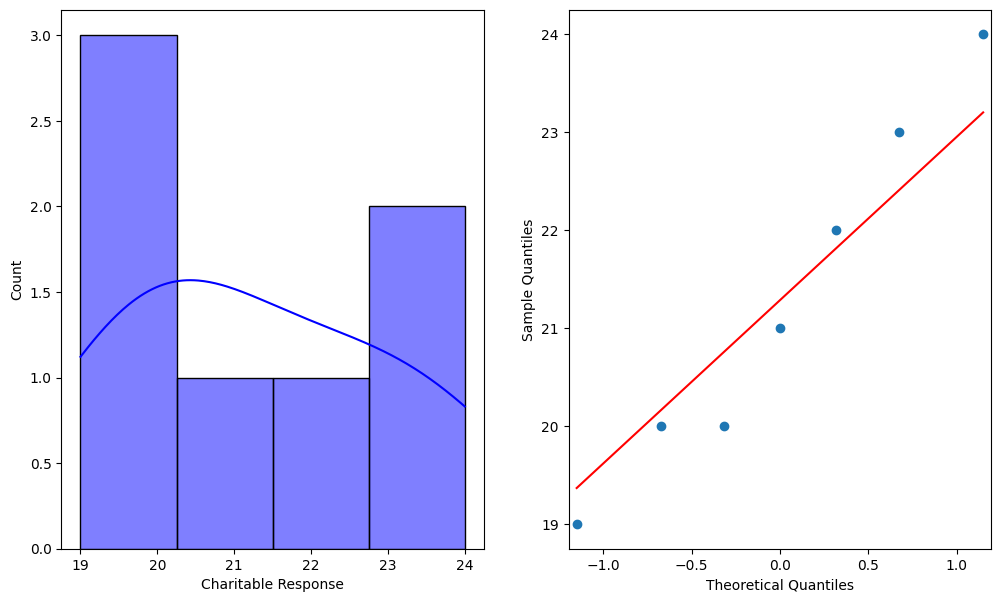

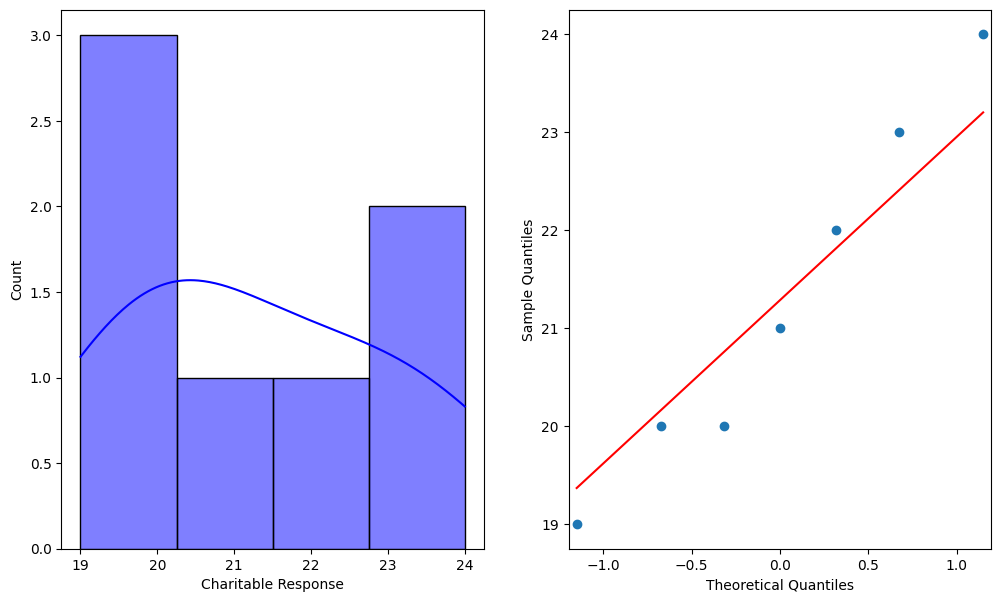

In [6]:
import statsmodels.graphics.gofplots as sm

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
# Histogram with normal curve for comparison
sns.histplot(samples['Charitable Response'],kde=True, color ='blue',ax=ax[0]) 
# Normal probability plot
sm.ProbPlot(samples['Charitable Response']).qqplot(line='s', ax=ax[1])

### 99% confidence interval

In [7]:
# set up confidence level
conf_level = 0.99

#create 99% confidence interval for population mean weight
ci = st.t.interval(confidence=conf_level, df=len(samples)-1, loc=np.mean(samples), scale=st.sem(samples))
ci_l = ci[0][0]
ci_u = ci[1][0]
print(f"Confidence interval at level {conf_level*100} is [{ci_l:.2f},{ci_u:.2f}]")

Confidence interval at level 99.0 is [18.76,23.81]


c:\Users\Xiaoyu Huang\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### Plot samples, sample mean, confidence interval of 95% confidence level

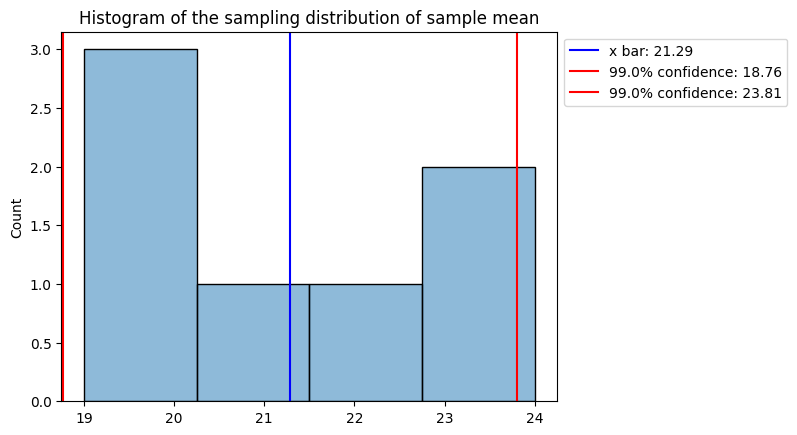

In [8]:
sample_mean = mean(samples['Charitable Response'])
# plot
plt.title("Histogram of the sampling distribution of sample mean")
sns.histplot(samples)
plt.axvline(x = sample_mean, color = 'b', label = f'x bar: {sample_mean:.2f}')
plt.axvline(x = ci_l, color = 'r', label = f'{conf_level*100}% confidence: {ci_l:.2f}')
plt.axvline(x = ci_u, color = 'r', label = f'{conf_level*100}% confidence: {ci_u:.2f}')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')

## Choosing sample size for estimating population mean
The sample size required to estimate a population mean 𝜇 to within an amount 𝑀 with 95% confidence is
$$𝑛=(1.96 \sigma/𝑀)^2.$$
- If 𝜎 is unknown, it may be estimated based on previous information or, for a population that is not too skewed, by using (range)/4.
- If the desired confidence level is something other than 95%, 1.96 is replaced by the appropriate 𝑧 critical value (for example, 2.58 for 99% confidence).

# 9.4 Bootstrap Confidence Intervals for a Population Proportion (Optional)
Recall that if
1. samples are random;
2. dataset is large,
then the sampling distribution of $\hat{p}$ is approximately normal and the large-sample confidence interval has the form:
$$𝑝 \pm (\text{critical value of 𝑧}) \sqrt{\frac{𝑝(1−\hat{p})}{n}}$$


Bootstrap an alternative method that can be used to obtain a confidence interval for a population proportion but that doesn’t require a large sample size. Bootstrapping works by considering how far sample proportions from random samples of size n tend to be from the value of the population proportion **if the value of the population proportion were known**. Since the population is unknown, instead, we consider a **hypothetical population** very similar to the sample distribution and use the observed sample proportion as the proportion for the hypothetical population.

**Bootstrap distribution of $\hat{p}$**: the distribution formed by taking many random samples of size n from the hypothetical population and calculating the according sample proportions. For example, we let the hypothetical population distribution be the sample distribution of 100 observations: $x_1, x_2, \cdots, x_100$. We first resample 10 samples (with replacement) from the hypothetical population distribution: $X_1^{*} = x_1, x_1, x_{19}, ...$ ,and use $X_1$ to calculate a sample proportion $\hat{p}_1^{*}$. We repeat the process to obtain $\hat{p}_1^{*}, \hat{p}_2^{*}, \cdots, \hat{p}_{100}^{*}$, and they form an empirical bootstrap distribution of sample proportion.

**Bootstrap confidence interval** of 95% confidence level: for a 95% confidence level, using the boundaries that capture the middle 95% of the simulated bootstrap distribution is equivalent to determining the endpoints of a confidence interval, which is represented as $[\hat{p} - a, \hat{p} + b]$, where $a,b$ are numbers and they are not necessarily equal.

## Example

### Generate population data

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean,pstdev

true_p = 0.7

# Population is of size 10000, randomly generated 
np.random.seed(seed=42) # fix the random seed
population = np.random.choice(a=[0,1],size=10000,replace=True,p=[1-true_p,true_p]).astype(float)
population_mean = mean(population)

### Collect samples and let them be hypothetical population

In [10]:
n_samples = 30

# collect samples
samples = np.random.choice(population,n_samples,replace=True)

# let hypotherical population be the sample distribution
hypo_populaiton = samples

### Histograms of both true population and hypothetical population

(array([3053.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6947.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

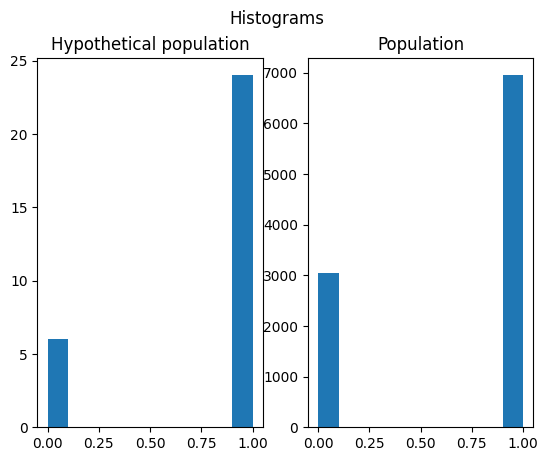

In [11]:
# plot histograms for hypothetical and true population

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Histograms")
ax1.set_title('Hypothetical population')
ax2.set_title('Population')
ax1.hist(hypo_populaiton)
ax2.hist(population)

### Perform bootstap

In [12]:
# set your confidence level, number of resampling, number of samples in each resampling batch
conf_level = 0.95
num_resampling = 100
batch_size = 7

import matplotlib.pyplot as plt
from scipy.stats import bootstrap
hypo_populaiton = (hypo_populaiton,)  # samples must be in a sequence

# perform bootstapping 
res = bootstrap(hypo_populaiton, np.mean, confidence_level = conf_level)
print("bootstrap distribution is: ")
print(res.bootstrap_distribution)

bootstrap distribution is: 
[0.76666667 0.83333333 0.7        ... 0.73333333 0.66666667 0.7       ]


### Compute confidence interval

In [13]:
# confidence interval
ci_l, ci_u = res.confidence_interval
print(f"Confidence interval of confidence level {conf_level} is: [{ci_l}, {ci_u}]")

Confidence interval of confidence level 0.95 is: [0.6333333333333333, 0.9333333333333333]


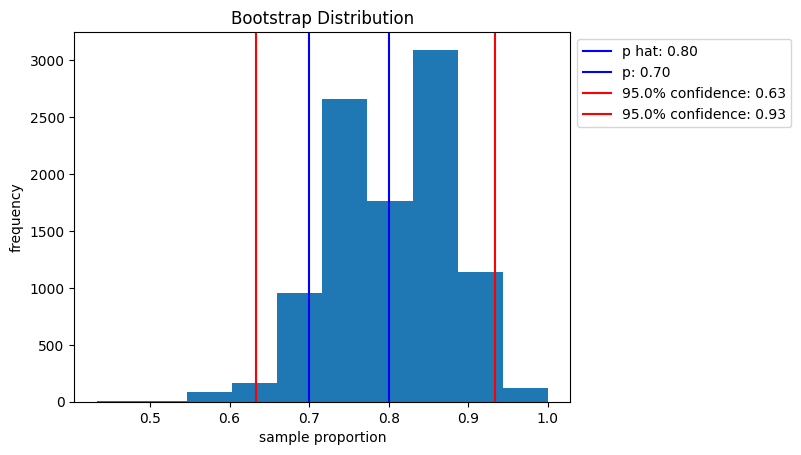

In [14]:
p_hat = mean(samples)

# plot bootstrap distribution
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution)
plt.axvline(x = p_hat, color = 'b', label = f'p hat: {p_hat:.2f}')
plt.axvline(x = true_p, color = 'b', label = f'p: {true_p:.2f}')
plt.axvline(x = ci_l, color = 'r', label = f'{conf_level*100}% confidence: {ci_l:.2f}')
plt.axvline(x = ci_u, color = 'r', label = f'{conf_level*100}% confidence: {ci_u:.2f}')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('sample proportion')
ax.set_ylabel('frequency')
plt.show()

# 9.5 Bootstrap Confidence Intervals for a Population Mean

## Example (Example9.16)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statistics import mean,pstdev
import pandas as pd

url = "https://github.com/cocoxhuang/STAT213/blob/main/Ex09.10.csv?raw=True"
samples = pd.read_csv(url)
samples

,Charitable Response
0,23
1,22
2,21
3,24
4,19
5,20
6,20


### Perform bootstap

In [16]:
# Let hypothetical populaiton
samples = samples['Charitable Response']
hypo_populaiton = samples

# set your confidence level, number of resampling, number of samples in each resampling batch
conf_level = 0.95
num_resampling = 100
batch_size = 7

import matplotlib.pyplot as plt
from scipy.stats import bootstrap
hypo_populaiton = (hypo_populaiton,)  # samples must be in a sequence

# perform bootstapping 
res = bootstrap(hypo_populaiton, np.mean, confidence_level = conf_level, batch=batch_size, n_resamples=num_resampling)

### Compute confidence interval

In [17]:
# confidence interval
ci_l, ci_u = res.confidence_interval
print(f"Confidence interval of confidence level {conf_level} is: [{ci_l}, {ci_u}]")

Confidence interval of confidence level 0.95 is: [20.285714285714285, 22.571428571428573]


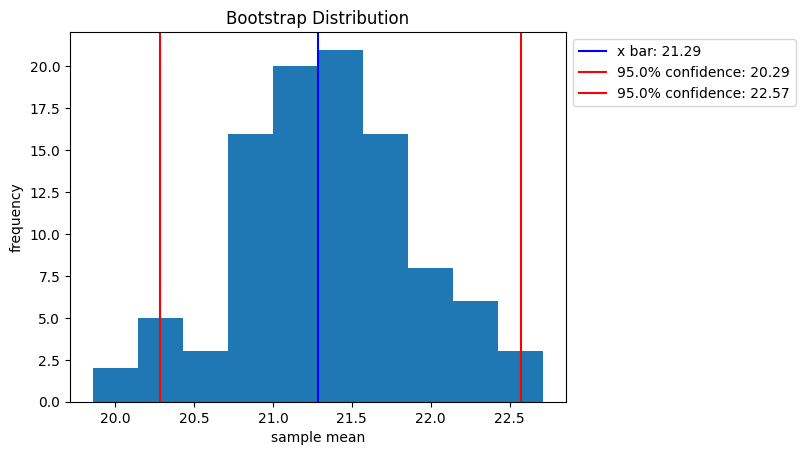

In [18]:
sample_mean = mean(samples)

# plot bootstrap distribution
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution)
plt.axvline(x = sample_mean, color = 'b', label = f'x bar: {sample_mean:.2f}')
plt.axvline(x = ci_l, color = 'r', label = f'{conf_level*100}% confidence: {ci_l:.2f}')
plt.axvline(x = ci_u, color = 'r', label = f'{conf_level*100}% confidence: {ci_u:.2f}')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('sample mean')
ax.set_ylabel('frequency')
plt.show()